In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Shows the distribution plot using seaborn

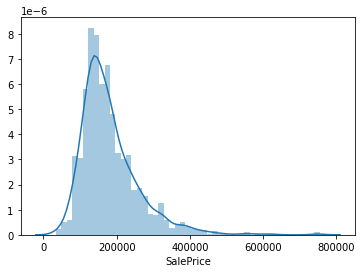

In [5]:
sns.distplot(df_train['SalePrice'])

**Skewness**
- Lack of Symmetry of graph
- Value <-1 or >1 indicate more skewed distribution

**Kurtosis**
- Fatter tails with sample points more present in tail region i.e more/far away outliers are present in data; this indicates more kurtosis
- Normally distributed graph has kurtosis=3
- Ranges from 1 to Infinity

In [6]:
print("Skewness: " + str(df_train['SalePrice'].skew()))
print("Kurtosis: " + str(df_train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


### Relationship with Numerical Variables

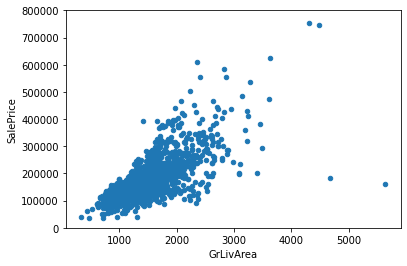

In [3]:
var = "GrLivArea"
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

Text(0.5, 0, 'GrLivArea')

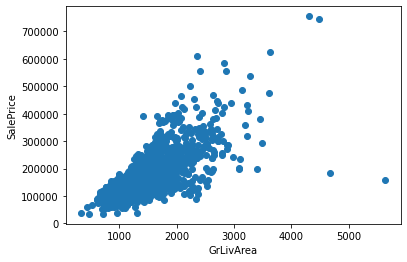

In [11]:
#does the same thing as above function does
plt.scatter(df_train[var],df_train['SalePrice']) 
plt.ylabel('SalePrice')
plt.xlabel(var)

#### Above graph shows that the two variables are well related to each other with linear relationship

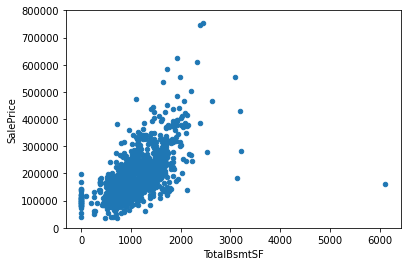

In [12]:
var="TotalBsmtSF"
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

### Relationship with Categorical Variables

(-0.5, 9.5, 0.0, 800000.0)

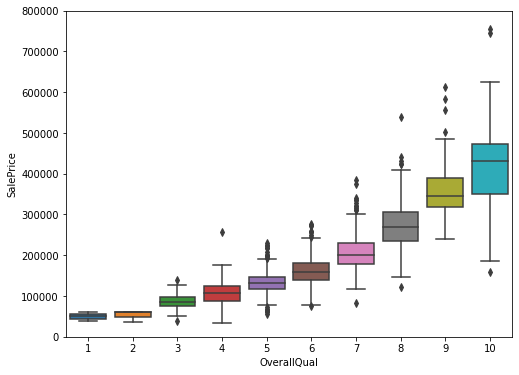

In [24]:
var="OverallQual"
data = pd.concat([df_train['SalePrice'],df_train[var]],
                axis=1)
f, ax = plt.subplots(figsize=(8,6)) #(x,y) lengths
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

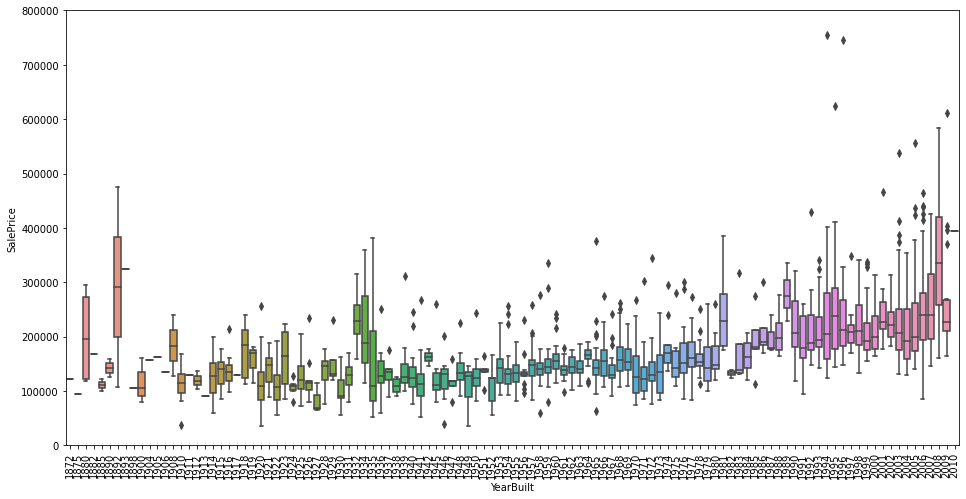

In [16]:
var="YearBuilt"
data = pd.concat([df_train['SalePrice'],df_train[var]],
                axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

### Correlation Matrix

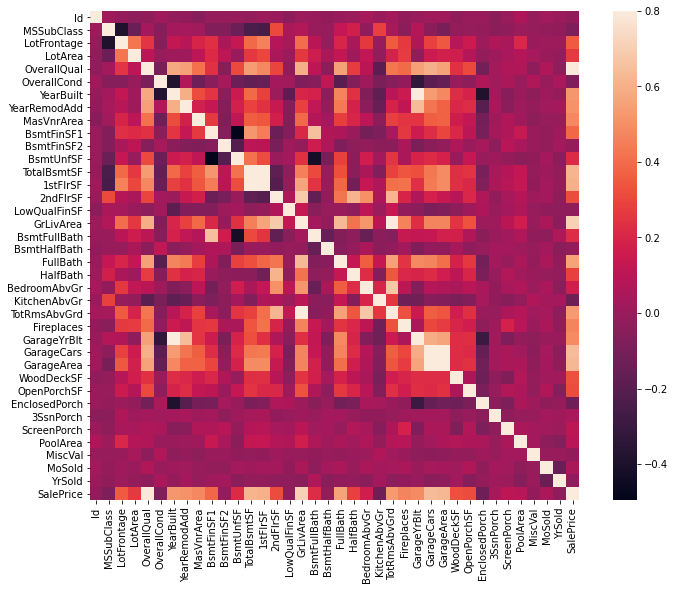

In [21]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

### Zoomed Heatmap Style

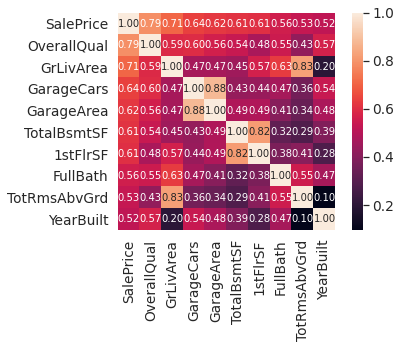

In [26]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                annot_kws={'size':10}, yticklabels=cols.values,
                xticklabels=cols.values)
plt.show()

### Have to do Time Series Analysis on YearBuilt

### Lots of Scatter Plots

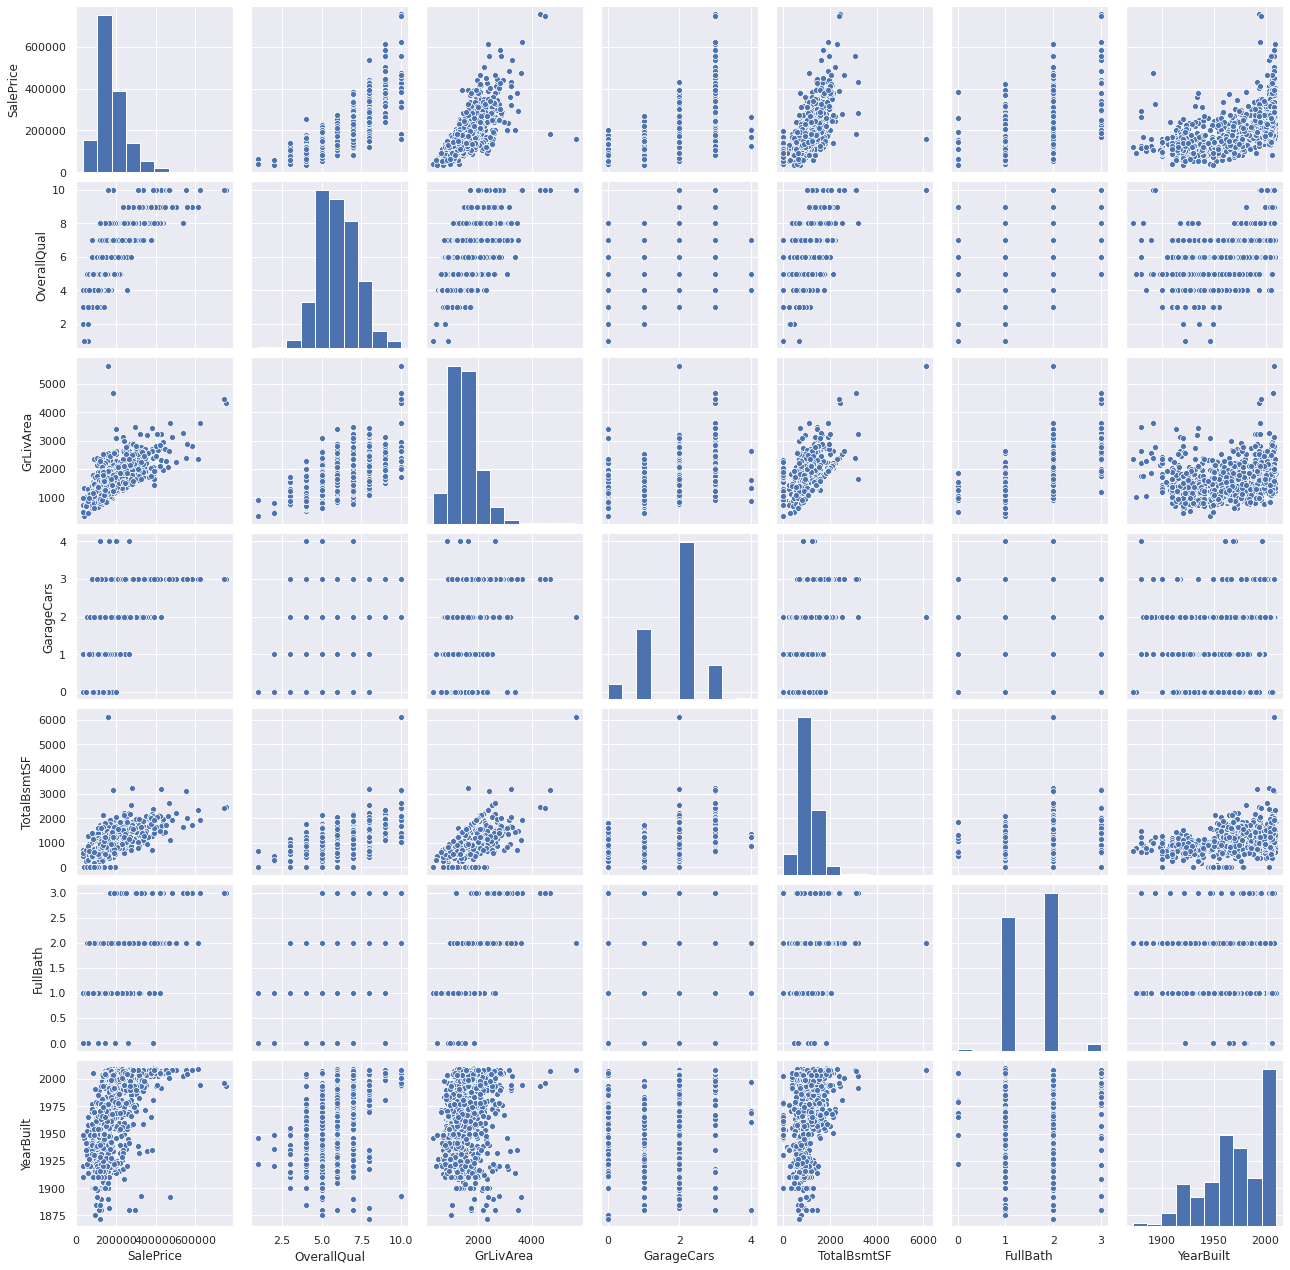

In [27]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea',
        'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

### Missing Data

In [3]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(
            ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

### Deleting Variables with Missing Data

In [4]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #so no missing data


0

### Univariate Analysis

In [19]:
saleprice_scaled = StandardScaler().fit_transform(
        df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print("Low end of distribution of SalePrice:")
print(low_range)
print("High end of distribution of SalePrice")
print(high_range)

Low end of distribution of SalePrice:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
High end of distribution of SalePrice
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


### Bivariate Analysis

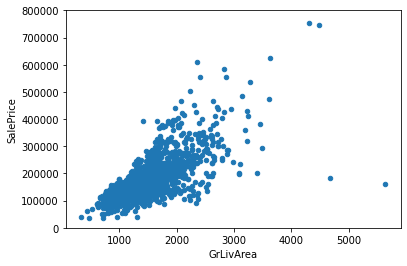

In [6]:
var="GrLivArea"
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [5]:
#deleting points
df_train_temp = df_train.sort_values(by='GrLivArea', ascending=False)[:2]
print('to be deleted ids', df_train_temp['Id'], 'shape', df_train_temp['Id'].shape)
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

to be deleted ids 1298    1299
523      524
Name: Id, dtype: int64 shape (2,)


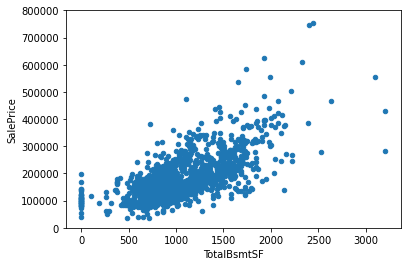

In [21]:
#bivariate analysis saleprice/grlivarea
var='TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000))

#### In this case, we might feel tempted to delete data>3000, but it's not worth it

### In search for normality

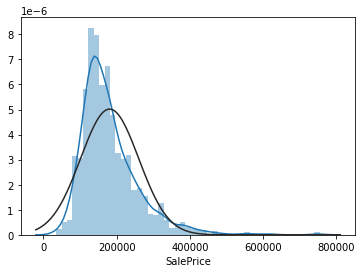

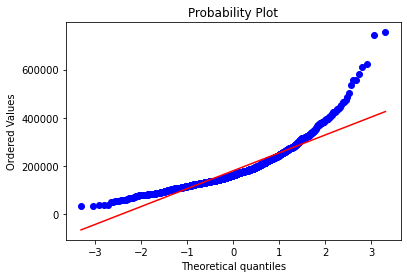

In [6]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [7]:
#applying log transformations
df_train['SalePrice'] = np.log(df_train['SalePrice'])

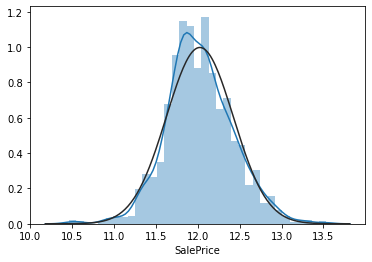

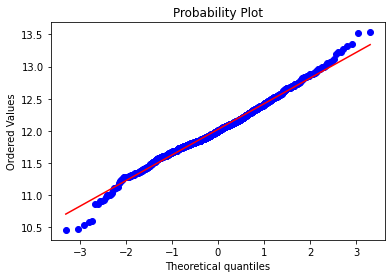

In [8]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

### GrLivArea 

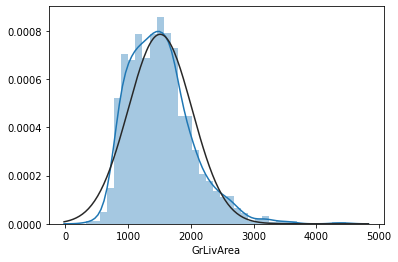

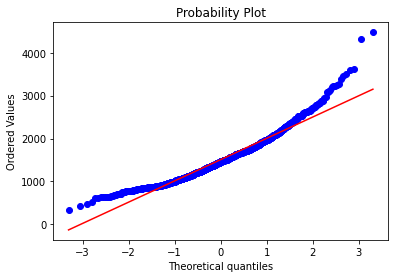

In [9]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [10]:
#as skewness is present, let's log transform data
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

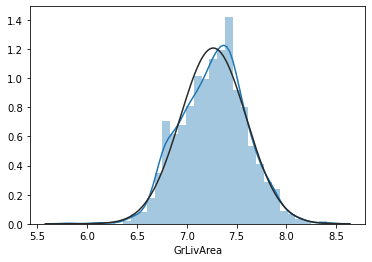

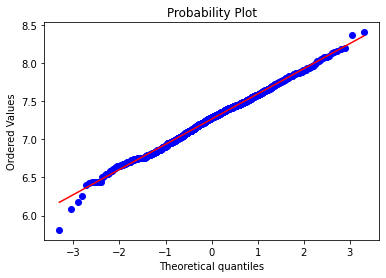

In [11]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

### TotalBsmtSF

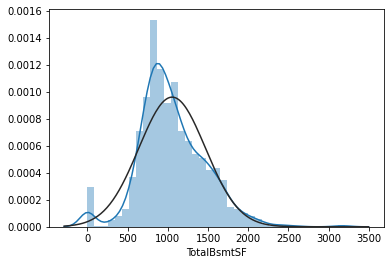

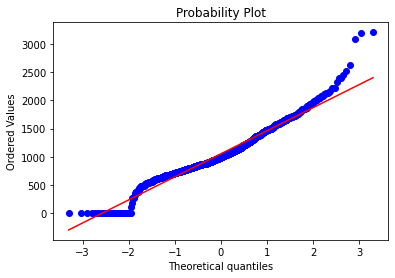

In [12]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [15]:
minnum = df_train['TotalBsmtSF'].min()
print(minnum)
maxnum = df_train['TotalBsmtSF'].max()
print(maxnum)

0
3206


In [16]:
#create column for new variable
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']),
                               index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [17]:
#transform data
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

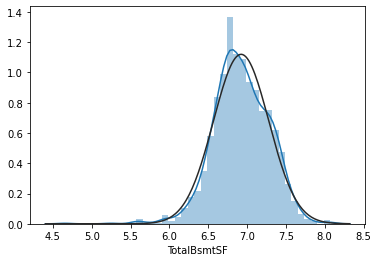

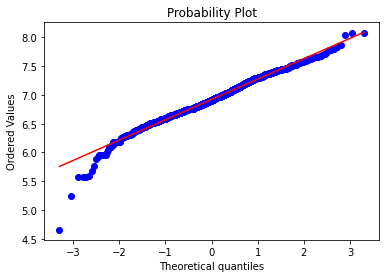

In [18]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

### Homoscedasticity

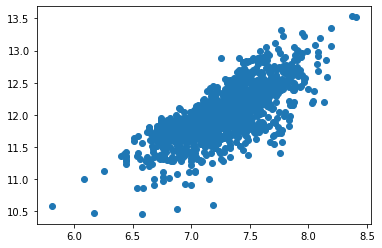

In [19]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

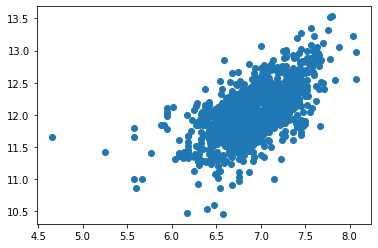

In [21]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], 
           df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

### So by solving the normality problem, conic shape of previous scatter plot is removed, along with homoscedasticity problem

### Get Dummy Variables
#### convert categorical variable into dummy ones

In [22]:
df_train = pd.get_dummies(df_train)